## Linear Regression Modeling and an Introduction to sklearn
### Introduction to Data Science
### Last Updated: January 13, 2023
---  

### PREREQUISITES
- variables
- data types
- pandas

### SOURCES 
- [sklearn Introduction](https://scikit-learn.org/stable/index.html)
- [R-Squared in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

### OBJECTIVES
- Identify variables that should not be used as predictors as they would introduce bias into the model
- Understand why a model is trained on a portion of the data
- Introduce some basic functionality of the `sklearn` package
- Illustrate how to fit a linear regression model with `sklearn`
- Compare the fit of two linear regression models using their fit statistics

### CONCEPTS
- `sklearn` interface
- predictors that can introduce bias or ethical issues should not be used in models
- splitting data into training set and testing set
- generalization of patterns to new data
- target variable and predictor variables
- making predictions from a model
- assessing model fit with R-squared

---

## I. Motivating Model Fitting

We now have cleaned, prepared data in a format ready for modeling.  
We learned how to transform data into useful features.  
Here, we discuss fitting a model to the data.  
Typical reasons for modeling:
- understanding how the features **explain** the target
- using the features to **predict** the target

Model fitting is done with software packages.  
We discuss a powerful Python package for machine learning: `scikit-learn` (`sklearn` for short).  

This notebook will provides an outline of *linear regression* and a very brief demo of `sklearn`. You are encouraged to explore and go further.

**NOTE:**  
Be sure to confirm the validity of the data before training a model on it.  
Describing the data with statistical summaries will be helpful here.

## II. Introducing Linear Regression

The simplest model form is linear regression, which assumes a linear relationship between one or more predictors $X$ and expected value of the target $Y$. 

We won't discuss all of the Gauss Markov assumptions of linear regression (but a good book on the subject will cover it).

The mathematical form is:

$E(Y) = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n$

where 

- $E(Y)$ is the target
- $\beta_0$ is an intercept parameter
- $\beta_1$, ..., $\beta_n$ are slope parameters or *weights*
- $X_1$, ..., $X_n$ are predictors
- $n$ is the number of predictors, which is one in the simplest case

When all predictors are zero, the target value is equal to $\beta_0$

For the case of a single predictor, the model is called *simple linear regression*.

**The key to regression is to discover the best set of predictors that explains or predicts the target.**  
As we add useful predictors, it is possible to minimize the error between the predicted values and the target values.

Additionally, the intercept and weights are estimated from data (model fitting).  
These parameter values are determined such that the errors between the predicted values and the target values are minimized.  


We turn to model fitting with sklearn next.

## III. Being Thoughtful About Features

It may be tempting, particularly in the age of automation, to include all features in the model, perhaps letting the algorithm arrive at the best set.

There are some important things to think about when deciding features:

1. The features should make intuitive sense. In practice, the data scientist might discuss the features with the line of business, the product manager, and other stakeholders.

2. **The features should not introduce bias into the model, or introduce ethical issues.**

One needs to be careful around the use of demographic variables, as it can be easy to discriminate based on age, gender, race, and ethnicity.

Examples of variables that would introduce bias, and therefore should be avoided in modeling, include:

- age, race, ethnicity, gender, religion, disability, color, national origin, religion
- employment type, where some jobs are skewed toward one gender, such as nursing (this targets females)
- an indicator if a person pressed 2 to hear a message in Spanish (this targets an ethnicity)
- salary (this targets race/ethnicity)
- the kind of cuisine served at a restaurant (this is more subtle, but can target race/ethnicity)

For the *salary* predictor, if one were predicting who might default on a mortgage, it would be better from an ethics viewpoint to use *debt/income* as a predictor.

---

**THINK ABOUT AND DISCUSS**

Can you think of other predictors that could introduce bias in a model?

---

In summary, the model predictors should be carefully considered. It is not enough that predictors improve the model fit; they must also make sense and not cause harm.

## IV. Fit a Regression Model

### A. Fetch and Inspect Data

import sklearn dataset and functionality

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # R-squared

import pandas as pd

Next, we fetch a built-in housing price dataset from `sklearn`.  
The data is based on a California district and it is aggregated.

In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
type(housing)

sklearn.utils.Bunch

Inspect what's in the object

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Look at the dataset description

In [6]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

Look at the target variable:

In [7]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

The target is also called the `response variable`, `outcome variable`, or `dependent variable`.  
Different subject areas give it a different name. In machine learning, `target` is used.

**The targets represent scaled house prices (they are divided by 100,000)**

In [8]:
type(housing.target)

numpy.ndarray

*housing.data* contains the data in an array object.

In [9]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [10]:
type(housing.data)

numpy.ndarray

the shape of the array: (rows, columns)

In [11]:
housing['data'].shape

(20640, 8)

Next, look at the feature names. Features are also called `factors`, `predictors`, or `independent variables`.  
Again, this depends on the subject area. In machine learning, `feature` or `predictor` is used.

In [12]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

**These features may be useful in predicting house prices (the targets).**

---

### B. Data Splitting

When we train a model on a dataset, it learns the patterns in that data.    
In fact, it might learn it too well, memorizing nuances (overfitting).  
There is a very real risk that the model might not do well on new data it hasn't seen.

To help reduce this risk, we do this:  
1. Split the data into several pieces. Here, we use two pieces called a **train set** and a **test set**.  
2. Train the model on the train set  
3. Evaluate the model on the test set

The hope is that the model learns the right patterns, and that it **generalizes** to the test set.  
This means that the model performs similarly on the test set.


Split the data into 60% train, 40% test sets. The helper function `train_test_split` can do this:

In [13]:
x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, train_size = 0.6, random_state=314)

Show the dataset sizes

In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(12384, 8256, 12384, 8256)

In [15]:
type(x_train)

numpy.ndarray

In [16]:
12384/(12384+8256)

0.6

**Question: what is the data type holding these numbers?**

---

### C. Data Scaling

Next, we will scale the data by following these steps:

1. Scale the x_train and x_test data using `StandardScaler`. **Why do we do this?**
2. Train a regression model on (x_train, y_train). **This is common notation to show that X and Y are paired into observations used in training the model**
3. Feed `x_test` into the model to make predictions `y_test_predicted`
4. Evaluate model performance by comparing `y_test_predicted` to `y_test`

---

**1. Instantiate StandardScaler object and fit it**

In [17]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

How this works: the scaler does three things:
1. it computes the means and standard deviations of each column and saves them
2. for each column, it subtracts its mean
2. for each column, it divides by its standard deviation

Look at the scaled training data.

In [18]:
x_train_s

array([[-5.41768936e-01,  8.97274139e-01, -1.85640214e-02, ...,
        -4.28501066e-02, -2.20840635e-01,  5.77185876e-02],
       [-4.42312682e-01,  1.85379671e+00, -1.21232764e-01, ...,
         1.15088564e-02,  1.75535469e+00, -9.08412716e-01],
       [-1.21121241e+00, -9.36060779e-01, -7.45820655e-01, ...,
         1.34336061e-01,  7.71939953e-01, -4.52879304e-01],
       ...,
       [ 2.88703976e-01, -1.09548121e+00,  2.45801399e-01, ...,
         6.25970319e-02, -7.68743129e-01,  1.03886748e+00],
       [-4.89745665e-01,  2.04617870e-02, -3.46951864e-01, ...,
        -8.33657386e-02,  4.53500897e-01, -1.16371166e+00],
       [ 1.44241788e-01,  2.59592428e-01,  8.92070260e-04, ...,
        -6.70406776e-02, -1.40562124e+00,  1.25411953e+00]])

The column means are roughly all zero. This shows they are centered.

In [19]:
x_train_s.mean(axis=0)

array([-4.39298549e-15, -1.02774522e-16, -1.06658763e-14, -5.55920742e-15,
       -1.52942545e-17, -7.05635754e-16,  9.44804814e-15, -8.41492753e-14])

The column standard deviations are all one. This shows they are scaled.

In [20]:
x_train_s.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

### D. Set up and Fit Linear Regression Model

<img src="linreg.png">

The order of the passed data matters: (x, y)

Remember to used the scaled X data

In [21]:
reg = LinearRegression().fit(x_train_s, y_train)

List the model's attributes

In [22]:
dir(reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

show the predictor coefficients (also called `weights` or `betas`)

In [23]:
reg.coef_

array([ 0.81403101,  0.11883616, -0.260123  ,  0.31025271, -0.00178077,
       -0.04600269, -0.91689468, -0.88930004])

show the `intercept`

In [24]:
reg.intercept_

2.060088804909497

**3. Predictions on test set (use *x_test_s* to predict *y_test*).**

First, you'll want to scale the `x_test` data.  
**Important point**: reuse the scaler from the training data.

In [25]:
x_test_s = scaler.fit_transform(x_test)

Next, feed `x_test_s` into the model to predict `y_test`

In [26]:
y_test_predicted = reg.predict(x_test_s)

**Compute residuals and plot residuals versus predicted (fitted) to assess fit**

For a model that fits well, there should not be an observable pattern in this plot.

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# residuals = actuals - predicted
residuals = y_test - y_test_predicted

Text(0, 0.5, 'residual')

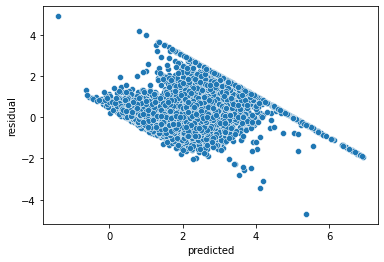

In [59]:
sns.scatterplot(x=y_test_predicted, y=residuals)
plt.xlabel('predicted')
plt.ylabel('residual')

This plot has a clear pattern: there is a downward sloping line at the top of the graph.  
The maximium target value is 5, while predicted values widely range at this maximum value.  
Plotting predicted versus actual makes this clearer:

Text(0, 0.5, 'predicted')

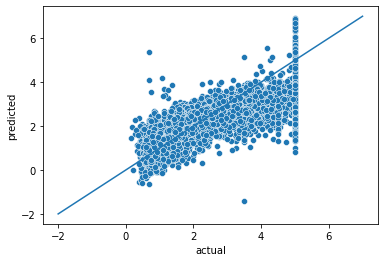

In [80]:
sns.scatterplot(x=y_test, y=y_test_predicted)
plt.plot((-2,7),(-2,7))
plt.xlabel('actual')
plt.ylabel('predicted')

Given the residual plot, this model does not fit well.  
Ideally, there would be other predictors that could be created / considered.

### E. Evaluate Model Performance

Notice: since we know `y_test`, we can compare it to our predictions.  

A common model fit metric for linear regression is `R-squared`.  

It measures the fraction of variation in Y explained by the model. A higher value is better.

The value's range is $[0,1]$ where zero means no explanatory power, and one means perfect explanatory power.

If you are interested in the details of the calculation, see the **Appendix** below.

___

We compute R-squared by calling the function: `r2_score`  
Note that the order of the inputs matters: (true, predicted) 

In [65]:
print(r2_score(y_test, y_test_predicted))

0.6078399673783987


This model explains more than half of the variation in prices.

## IV. Comparing Models

Next, we build a model using **only the first three predictors**, and measure the Adjusted R-squared for comparison.  

---

**Adjusted R-squared**

The Adjusted R-squared is a modification of R-Squared that penalizes model complexity (adding predictors).  
It is useful when comparing models.  
**sklearn** doesn't compute it directly, so we can define a formula.

Here is the mathematical definition:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]  

where:  
p = number of parameters (excluding constant)    
n = number of observations

In [95]:
def adj_rsquared(X, y, y_pred):
    r2 = r2_score(y, y_pred)
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    print('n:', n, 'p:', p)
    return adj_r2 

---

Now let's select a subset of predictors and repeat the steps from above.

In [84]:
x_train_subset = x_train[:,:3] # use all rows, and first three columns

Create a new scaling object

In [85]:
scaler2 = StandardScaler()
x_train_subset_s = scaler2.fit_transform(x_train_subset)

Fit a new model

In [86]:
reg2 = LinearRegression().fit(x_train_subset_s, y_train)

Now transform the first three predictors in the test set:

In [87]:
x_test_subset_s = scaler2.fit_transform(x_test[:,:3])

Make predictions

In [99]:
y_test_predicted2 = reg2.predict(x_test_subset_s)

Compute R-squared

In [100]:
print(r2_score(y_test, y_test_predicted2))

0.5206094971517826


Compute adjusted R-squared for this smaller model

In [101]:
adj_rsquared(x_test_subset_s, y_test, y_test_predicted2)

n: 8256 p: 3


0.5204352155826424

Compute adjusted R-squared for the larger model

In [102]:
adj_rsquared(x_test_s, y_test, y_test_predicted)

n: 8256 p: 8


0.6074595526505009

Just as we expected, it doesn't do as well. The adjusted R-squared is 0.520 versus 0.607 from the larger model.  
This tells us that the predictors we dropped were important in explaining the target.  
Note that the adjusted R-squared values are very similar to the R-squared values.

**Ultimately, adjusted R-squared is a useful way to compare the predictive power to two models.**

---

#### TRY FOR YOURSELF

1. Repeat the process on your own dataset:
   - Use `sklearn` to split the data, select predictors, scale them, fit a model, predict the targets in the test set, and compute R-squared
   
   

2. Select a different set of predictors and repeat the process from (1). What do the results tell you?

---  

## Appendix: Calculating R-Squared with a Formula

`R-squared` is easily calculated in software, but the formula is:

$$R-squared = 1 - SS_{res} / SS_{tot}$$

where

`SS_res` is the sum of squared residuals. This is computed by:
1. calculating the residuals: `y_test - y_test_predicted` for each data point. these are errors, where smaller is better.
2. squaring the residuals
3. summing the squared residuals

`SS_tot` is the total sum of squares. This is computed by:
1. Computing the average of `y_test`, which we call `y_test_mean`
2. calculating the residuals: `y_test - y_test_mean` for each data point.
3. squaring the residuals
4. summing the squared residuals

Conceptually, there is generally variance in the data, and `SS_tot` is proportional to that variance.  
if `SS_{res}` is much smaller than `SS_tot`, it says that the model is explaining most of that variance.  
This results in `R-squared` close to one.
___